In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import random

Goal:  
Create a dataframe that has a row for each player for a given season plus one for career  
Will also include features for the least 3 years averaged

In [33]:
df_pst = pd.read_csv('../data/nat_stat_trick/2017_pst_nst.csv')
df_oirel = pd.read_csv('../data/nat_stat_trick/2017_oirel_nst.csv')
df_woirel = pd.read_csv('../data/nat_stat_trick/2017wind_oirel_nst.csv')

In [14]:
df_pst.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,769,Connor McDavid,EDM,C,82,1766.800000,41,67,39,28,...,0,36,67,111,28,118,46,376,533,41.36
1,169,Claude Giroux,PHI,C,82,1669.800000,34,68,33,35,...,0,26,44,34,30,54,23,638,450,58.64
2,484,Nikita Kucherov,T.B,R,80,1585.716667,39,61,33,28,...,0,36,79,66,31,92,15,3,2,60.00
3,91,Evgeni Malkin,PIT,C,78,1481.216667,42,56,32,24,...,1,30,73,75,48,98,32,460,592,43.73
4,659,Nathan MacKinnon,COL,C,74,1472.983333,39,58,38,20,...,1,24,41,36,38,74,22,485,672,41.92


In [34]:
df_pst['Unnamed: 0'] = 2017
df_oirel['Unnamed: 0'] = 2017
df_woirel['Unnamed: 0'] = 2017

In [29]:
df_pst.shape

(890, 34)

In [31]:
df_pst.head()

,Unnamed: 0,Player,Team,Position,GP,TOI,Goals,Total Assists,First Assists,Second Assists,...,Misconduct,Penalties Drawn,Giveaways,Takeaways,Hits,Hits Taken,Shots Blocked,Faceoffs Won,Faceoffs Lost,Faceoffs %
0,2017,Connor McDavid,EDM,C,82,1766.800000,41,67,39,28,...,0,36,67,111,28,118,46,376,533,41.36
1,2017,Claude Giroux,PHI,C,82,1669.800000,34,68,33,35,...,0,26,44,34,30,54,23,638,450,58.64
2,2017,Nikita Kucherov,T.B,R,80,1585.716667,39,61,33,28,...,0,36,79,66,31,92,15,3,2,60.00
3,2017,Evgeni Malkin,PIT,C,78,1481.216667,42,56,32,24,...,1,30,73,75,48,98,32,460,592,43.73
4,2017,Nathan MacKinnon,COL,C,74,1472.983333,39,58,38,20,...,1,24,41,36,38,74,22,485,672,41.92


In [25]:
df_pst.shape

(890, 34)

In [35]:
for y in range(2016, 2006, -1):
    if y > 2008:
        twoirel = pd.read_csv('../data/nat_stat_trick/{}wind_oirel_nst.csv'.format(y))
        twoirel['Unnamed: 0'] = y
        df_woirel = pd.concat((df_woirel, twoirel))
    
    tpst = pd.read_csv('../data/nat_stat_trick/{}_pst_nst.csv'.format(y))
    toirel = pd.read_csv('../data/nat_stat_trick/{}_oirel_nst.csv'.format(y))

    tpst['Unnamed: 0'] = y
    toirel['Unnamed: 0'] = y

    df_pst = pd.concat((df_pst, tpst))
    df_oirel = pd.concat((df_oirel, toirel))


In [36]:
df_pst.shape

(9684, 34)

In [37]:
df_oirel.shape

(9684, 52)

In [38]:
df_woirel.shape

(10354, 52)

In [39]:
df_pst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 0 to 851
Data columns (total 34 columns):
Unnamed: 0          9684 non-null int64
Player              9684 non-null object
Team                9684 non-null object
Position            9684 non-null object
GP                  9684 non-null int64
TOI                 9684 non-null float64
Goals               9684 non-null int64
Total Assists       9684 non-null int64
First Assists       9684 non-null int64
Second Assists      9684 non-null int64
Total Points        9684 non-null int64
IPP                 9684 non-null object
Shots               9684 non-null int64
SH%                 9684 non-null object
iCF                 9684 non-null int64
iFF                 9684 non-null int64
iSCF                9684 non-null int64
iHDCF               9684 non-null int64
Rush Attempts       9684 non-null int64
Rebounds Created    9684 non-null int64
PIM                 9684 non-null int64
Total Penalties     9684 non-null int64
Minor  

In [40]:
df_pst.Position.value_counts()

D       3305
C       2596
L       1912
R       1757
C, L      62
C, R      32
L, R      19
D, R       1
Name: Position, dtype: int64

In [41]:
df_woirel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10354 entries, 0 to 1175
Data columns (total 52 columns):
Unnamed: 0               10354 non-null int64
Player                   10354 non-null object
Team                     10354 non-null object
Position                 10354 non-null object
GP                       10354 non-null int64
TOI                      10354 non-null float64
TOI/GP                   10354 non-null float64
CF/60 Rel                10354 non-null float64
CA/60 Rel                10354 non-null float64
CF% Rel                  10354 non-null object
FF/60 Rel                10354 non-null float64
FA/60 Rel                10354 non-null float64
FF% Rel                  10354 non-null object
SF/60 Rel                10354 non-null float64
SA/60 Rel                10354 non-null float64
SF% Rel                  10354 non-null object
GF/60 Rel                10354 non-null float64
GA/60 Rel                10354 non-null float64
GF% Rel                  10354 non-nul

In [42]:
careers = df_pst.groupby('Player').sum()

In [44]:
careers.shape

(2236, 28)

In [46]:
careers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, A.J. Greer to Zenon Konopka
Data columns (total 28 columns):
Unnamed: 0          2236 non-null int64
GP                  2236 non-null int64
TOI                 2236 non-null float64
Goals               2236 non-null int64
Total Assists       2236 non-null int64
First Assists       2236 non-null int64
Second Assists      2236 non-null int64
Total Points        2236 non-null int64
Shots               2236 non-null int64
iCF                 2236 non-null int64
iFF                 2236 non-null int64
iSCF                2236 non-null int64
iHDCF               2236 non-null int64
Rush Attempts       2236 non-null int64
Rebounds Created    2236 non-null int64
PIM                 2236 non-null int64
Total Penalties     2236 non-null int64
Minor               2236 non-null int64
Major               2236 non-null int64
Misconduct          2236 non-null int64
Penalties Drawn     2236 non-null int64
Giveaways           2236 non-null int6

In [47]:
df_oirel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 0 to 851
Data columns (total 52 columns):
Unnamed: 0               9684 non-null int64
Player                   9684 non-null object
Team                     9684 non-null object
Position                 9684 non-null object
GP                       9684 non-null int64
TOI                      9684 non-null float64
TOI/GP                   9684 non-null float64
CF/60 Rel                9684 non-null float64
CA/60 Rel                9684 non-null float64
CF% Rel                  9684 non-null object
FF/60 Rel                9684 non-null float64
FA/60 Rel                9684 non-null float64
FF% Rel                  9684 non-null object
SF/60 Rel                9684 non-null float64
SA/60 Rel                9684 non-null float64
SF% Rel                  9684 non-null object
GF/60 Rel                9684 non-null float64
GA/60 Rel                9684 non-null float64
GF% Rel                  9684 non-null object
SCF/60 Rel  

### EDA / Plotting

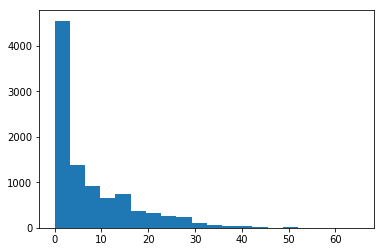

In [50]:
plt.hist(df_pst['Goals'], bins = 20)
plt.show()

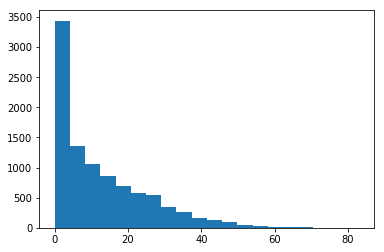

In [52]:
plt.hist(df_pst['Total Assists'], bins = 20)
plt.show()

In [53]:
df_pst['Goals'].sum(), df_pst['Total Assists'].sum()

(71424, 121805)

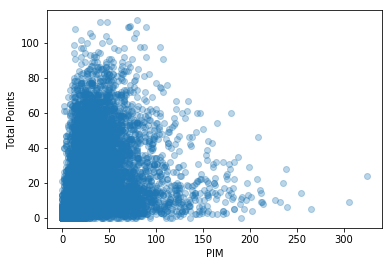

In [58]:
plt.scatter(df_pst['PIM'], df_pst['Total Points'], alpha = 0.3)
plt.xlabel('PIM')
plt.ylabel('Total Points')
plt.show()

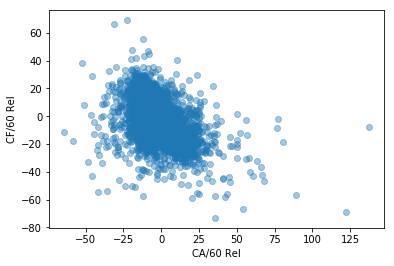

In [60]:
plt.scatter(df_oirel['CA/60 Rel'], df_oirel['CF/60 Rel'], alpha = 0.4)
plt.xlabel('CA/60 Rel')
plt.ylabel('CF/60 Rel')
plt.show()

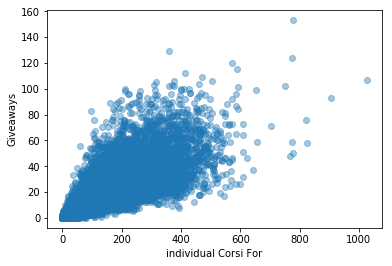

In [61]:
plt.scatter(df_pst['iCF'], df_pst['Giveaways'], alpha = 0.4)
plt.xlabel('individual Corsi For')
plt.ylabel('Giveaways')
plt.show()

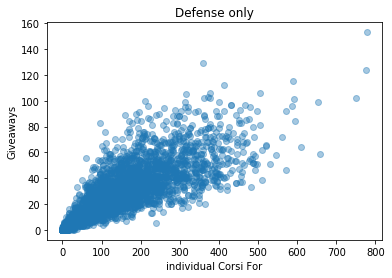

In [63]:
plt.scatter(df_pst[df_pst.Position == 'D']['iCF'], df_pst[df_pst.Position == 'D']['Giveaways'], alpha = 0.4)
plt.xlabel('individual Corsi For')
plt.ylabel('Giveaways')
plt.title('Defense only')
plt.show()

In [64]:
df_pst.to_csv('../data/all_pst.csv')
df_oirel.to_csv('../data/all_oirel.csv')
df_woirel.to_csv('../data/all_woirel.csv')